Data taken from free to use source: http://www.opendata500.com/us/download/us_companies.csv

In [1]:
import urllib.request
import shutil

url = 'http://www.opendata500.com/us/download/us_companies.csv'
file_name = 'data.csv'
user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'
headers={'User-Agent':user_agent,} 

request=urllib.request.Request(url, None, headers)
with urllib.request.urlopen(request) as response, open(file_name, 'wb') as out_file:
    shutil.copyfileobj(response, out_file)


In [2]:
import pandas as pd
df = pd.DataFrame(pd.read_csv('data.csv'))

In [3]:
df

,company_name_id,company_name,url,year_founded,city,state,country,zip_code,full_time_employees,company_type,...,business_model,social_impact,description,description_short,source_count,data_types,example_uses,data_impacts,financial_info,last_updated
0,3-round-stones-inc,"3 Round Stones, Inc.",http://3RoundStones.com,2010.0,Washington,DC,us,20004.0,1-10,Private,...,"Business to Business, Business to Consumer",NaN,3 Round Stones produces a platform for publish...,Our Open Source platform is used by the Fortun...,NaN,NaN,NaN,[],"3 Round Stones is a profitable, self-funded, w...",2014-11-12 14:44:25.969871
1,48-factoring-inc,48 Factoring Inc.,https://www.48factoring.com,2014.0,Philadelphia,PA,us,19087.0,51-200,Private,...,Business to Business,Small Business Owners,The company mission is to provide finance to s...,48 Factoring Inc. is one of the best financial...,11-50,Business,NaN,"[u'Cost efficiency', u'Job growth', u'Revenue ...",NaN,2015-05-18 11:36:39.902880
2,5psolutions,5PSolutions,www.5psolutions.com,2007.0,Fairfax,VA,us,22003.0,1-10,Private,...,"Business to Business, Business to Consumer, Bu...",NaN,"At 5PSolutions, we wish to make all basic info...",5PSolutions are artisans of mobile platforms.,NaN,NaN,NaN,[],NaN,2014-11-12 15:09:35.485949
3,abt-associates,Abt Associates,abtassoc.com,1965.0,Cambridge,MA,us,2138.0,"1,001-5,000",Private,...,NaN,NaN,"Abt Associates is a mission-driven, internatio...","Abt Associates is a mission-driven, global lea...",101+,NaN,NaN,[],Employee-owned company. $552M/year.,2014-09-11 17:23:21.390289
4,accela,Accela,http://www.accela.com,1999.0,San Ramon,CA,us,94583.0,"501-1,000",Private,...,Business to Consumer,"Citizen engagement and participation, Good gov...",Accela powers thousands of services and millio...,Accela improves citizen engagement by making i...,101+,"Health/Healthcare, Housing, Public Safety",NaN,[],NaN,2014-09-16 16:30:49.172802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
524,zillow,Zillow,http://www.zillow.com/,2006.0,Seattle,WA,us,98101.0,"1,001-5,000",Public,...,NaN,NaN,Zillow is a home and real estate marketplace d...,Zillow is an online real estate database.,NaN,NaN,NaN,[],NaN,2014-08-21 15:25:48.411679
525,zocdoc,ZocDoc,http://www.zocdoc.com/,2007.0,New York,NY,us,10012.0,"501-1,000",Private,...,NaN,NaN,ZocDoc is a service to help people find and ma...,Patients use ZocDoc to book appointments with ...,NaN,NaN,NaN,[],NaN,2014-04-03 20:10:00.163762
526,zonability,Zonability,http://www.zonability.com/,2003.0,Austin,TX,us,78702.0,11-50,Private,...,"Business to Business, Business to Government, ...",NaN,Zonability is a web application that provides ...,Zonability is a web application that provides ...,NaN,NaN,NaN,[],NaN,2014-11-20 12:45:39.832982
527,zoner,Zoner,www.Zonerapp.com,2011.0,New York,NY,us,10018.0,1-10,Private,...,"Business to Business, Business to Consumer, no...",NaN,<p>Zoner is a Digital Zoning Optimization soft...,Zoner leverages transparency over fear so a pr...,1-10,NaN,NaN,[],NaN,2014-11-12 18:11:48.966303


In [4]:
# Variables

layers = ['company_type', 'state', 'city']
value = 'amount'
minimum_value = 3 # Skip values less than minimum

In [5]:
df['amount'] = [1 for x in range(len(df))]

In [6]:
city = df['city'].value_counts()
city = city[city > minimum_value]
df_big = df.loc[df['city'].isin(city.index)]   # reject small cities

In [7]:
def percentage_growth(l):
    s = 0
    res = [0]
    for i in range(len(l)-1):
        s += l[i]
        res.append(s / sum(l))
    return res

In [8]:
import matplotlib.pyplot as plt

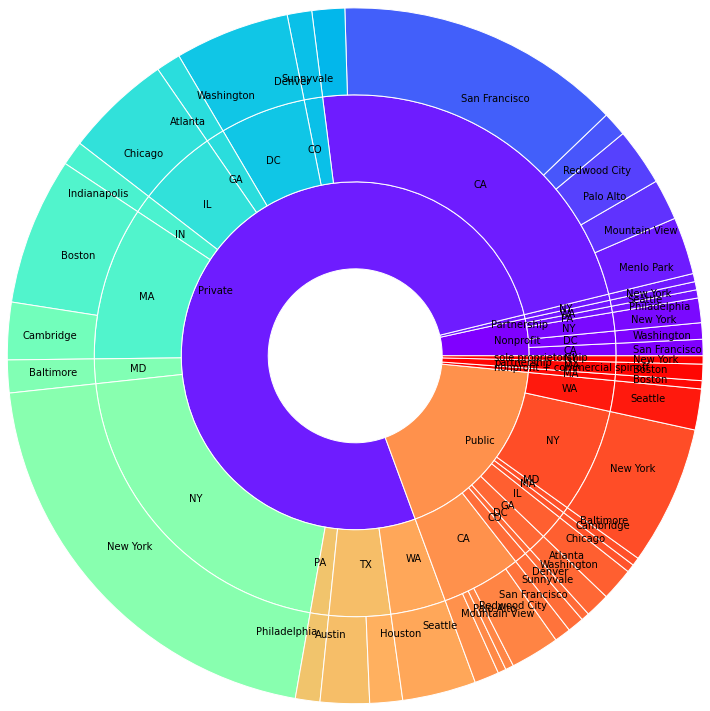

In [9]:
plt.axis("equal")

cmap = plt.get_cmap("rainbow")

for i, layer in enumerate(layers):
    radius = i + 2
    width = 1
    frame = df_big.groupby(layers[:i+1])['amount'].sum()
    colors = cmap(percentage_growth(frame))
    labels = [x[-1] if isinstance(x, tuple) else x for x in frame.index.to_numpy()]
    plt.pie(frame, labels=labels, colors=colors, radius=radius, wedgeprops=dict(width=width, edgecolor='w'), labeldistance=0.8)    
